# Trainer notes - Python Charmers

Copyright (c) 2018 Python Charmers. All rights reserved. Please do not distribute.

# Overview of visualizing data with Altair

This chapter / notebook is derived from the PyCon 2018 tutorial notes by Jake Vanderplas, available here: https://github.com/altair-viz/altair-tutorial. Copyright Jake Vanderplas 2018, distributed under the MIT License.

We'll start this tutorial with a demo to whet your appetite for learning more. This section purposely moves quickly through many of the concepts (e.g. data, marks, encodings, aggregation, data types, selections, etc.)
We will return to treat each of these in more depth later in the tutorial, so don't worry if it all seems to go a bit quickly!

In the tutorial itself, this will be done from scratch in a blank notebook.
However, for the sake of people who want to look back on what we did live, I'll do my best to reproduce the examples and the discussion here.

## Imports and Data

We'll start with importing the [Altair package](http://altair-viz.github.io/) and enabling the appropriate renderer (if necessary):

In [ ]:
!conda install --yes --channel conda-forge altair vega vega_datasets

In [ ]:
# Optional: if you want to save plots as e.g. SVG or PNG:
!pip install selenium

In [ ]:
import altair as alt

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
# alt.renderers.enable('colab')

Now we'll use the [vega_datasets package](https://github.com/altair-viz/vega_datasets), to load an example dataset:

In [ ]:
from vega_datasets import data as vgdata

### Exercise: use tab completion to check out the datasets available in `vgdata`

In [ ]:
cars = vgdata.cars()
cars.head()

Notice that this data is in columnar format: that is, each column contains an attribute of a data point, and each row contains a single instance of the data (here, a single make & model of car).

## Zero, One, and Two-dimensional Charts

Using Altair, we can begin to explore this data.

The most basic chart contains the dataset, along with a mark to represent each row:

In [14]:
alt.Chart(cars).mark_point()

This is a pretty silly chart, because it consists of 406 points, all laid-out on top of each other.

To make it more interesting, we need to *encode* columns of the data into visual features of the plot (e.g. x position, y position, size, color, etc.)

Let's encode miles per gallon on the x-axis using the ``encode()`` method:

In [18]:
cars[:2]

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01


In [39]:
chart = alt.Chart(cars).mark_tick().encode(
    x=alt.X('Miles_per_Gallon'),
    color=alt.Color('Origin', scale=alt.Scale(scheme='viridis'))
)

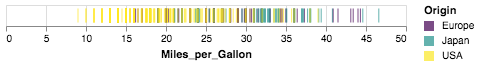

In [40]:
chart

In [24]:
type(chart)

altair.vegalite.v2.api.Chart

In [26]:
# !pip install selenium

In [25]:
# chart.save('mychart.png')

In [31]:
cars['Origin']

0         USA
1         USA
2         USA
3         USA
4         USA
5         USA
6         USA
7         USA
8         USA
9         USA
10     Europe
11        USA
12        USA
13        USA
14        USA
15        USA
16        USA
17        USA
18        USA
19        USA
20      Japan
21        USA
22        USA
23        USA
24      Japan
25     Europe
26     Europe
27     Europe
28     Europe
29     Europe
        ...  
376       USA
377       USA
378       USA
379       USA
380       USA
381       USA
382       USA
383    Europe
384     Japan
385     Japan
386       USA
387       USA
388     Japan
389     Japan
390     Japan
391     Japan
392     Japan
393     Japan
394       USA
395       USA
396       USA
397       USA
398     Japan
399       USA
400       USA
401       USA
402    Europe
403       USA
404       USA
405       USA
Name: Origin, Length: 406, dtype: object

In [29]:
chart.to_dict()['encoding']

{'color': {'type': 'nominal',
  'field': 'Origin',
  'scale': {'scheme': 'viridis'}},
 'x': {'type': 'quantitative', 'field': 'Miles_per_Gallon'}}

This is a bit better, but the ``point`` mark is probably not the best for a 1D chart like this.

Let's try the ``tick`` mark instead:

In [ ]:
alt.Chart(cars).mark_tick().encode(
    x='Miles_per_Gallon'
)

Or we can expand this into a 2D chart by also encoding the y value. We'll return to using ``point`` markers, and put ``Horsepower`` on the y-axis

### Exercise: try these data types for Cylinders:
- O: ordinal
- Q: quantitative
- N: nominal

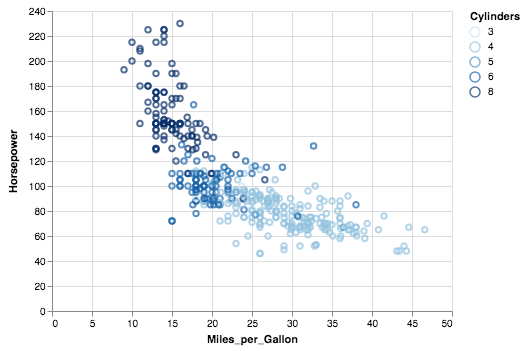

In [44]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Cylinders:O'
)

## Creating charts from your own data

Altair requires that data be passed in as either:

- a Pandas DataFrame
- a URL or filename (JSON or CSV)

Here we show a simple example of how to construct a DataFrame from NumPy arrays to pass to Altair.

In [45]:
import numpy as np
import pandas as pd

In [74]:
x = np.arange(20)
y = x**2

In [75]:
data = pd.DataFrame({'x': x, 'y': y})

In [76]:
data

,x,y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


Here is a very simple chart object:

In [77]:
base = alt.Chart(data, mark='line')

In [78]:
base.to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'values': [{'x': 0, 'y': 0},
   {'x': 1, 'y': 1},
   {'x': 2, 'y': 4},
   {'x': 3, 'y': 9},
   {'x': 4, 'y': 16},
   {'x': 5, 'y': 25},
   {'x': 6, 'y': 36},
   {'x': 7, 'y': 49},
   {'x': 8, 'y': 64},
   {'x': 9, 'y': 81},
   {'x': 10, 'y': 100},
   {'x': 11, 'y': 121},
   {'x': 12, 'y': 144},
   {'x': 13, 'y': 169},
   {'x': 14, 'y': 196},
   {'x': 15, 'y': 225},
   {'x': 16, 'y': 256},
   {'x': 17, 'y': 289},
   {'x': 18, 'y': 324},
   {'x': 19, 'y': 361}]},
 'mark': 'line',
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json'}

In [79]:
chart1 = base.encode(
    x='x',
    y='y'
)

chart2 = base.mark_bar().encode(
    x='x',
    y='y'
)

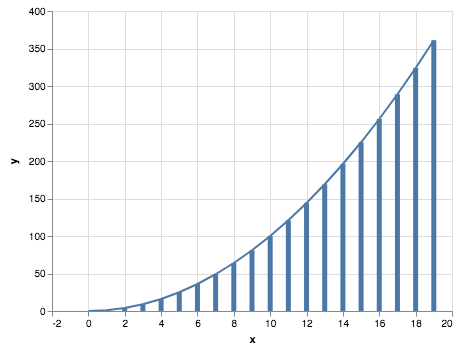

In [80]:
chart1 + chart2

The idiomatic way to construct the above chart is like this:

In [81]:
linechart = alt.Chart(data).mark_line().encode(
     x='x',
     y='y'
)

In [82]:
from pprint import pprint
pprint(linechart.to_dict())

{'$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json',
 'config': {'view': {'height': 300, 'width': 400}},
 'data': {'values': [{'x': 0, 'y': 0},
                     {'x': 1, 'y': 1},
                     {'x': 2, 'y': 4},
                     {'x': 3, 'y': 9},
                     {'x': 4, 'y': 16},
                     {'x': 5, 'y': 25},
                     {'x': 6, 'y': 36},
                     {'x': 7, 'y': 49},
                     {'x': 8, 'y': 64},
                     {'x': 9, 'y': 81},
                     {'x': 10, 'y': 100},
                     {'x': 11, 'y': 121},
                     {'x': 12, 'y': 144},
                     {'x': 13, 'y': 169},
                     {'x': 14, 'y': 196},
                     {'x': 15, 'y': 225},
                     {'x': 16, 'y': 256},
                     {'x': 17, 'y': 289},
                     {'x': 18, 'y': 324},
                     {'x': 19, 'y': 361}]},
 'encoding': {'x': {'field': 'x', 'type': 'quantitative'},
    

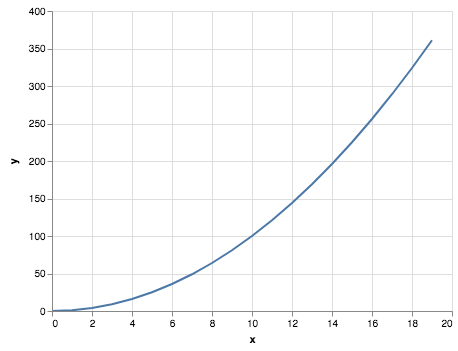

In [83]:
linechart

#### Exercise: try various ways of plotting $y = x^2$

For example: only encode the $y$ channel. Invert the channels. Try these encodings:

- color
- size

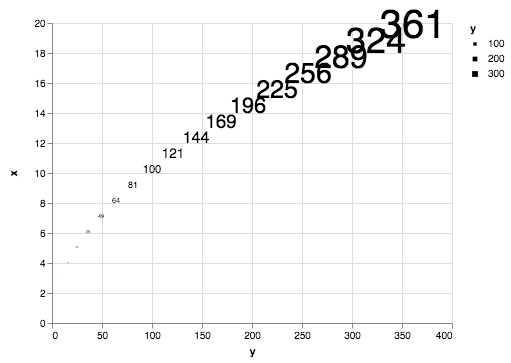

In [92]:
alt.Chart(data).mark_text().encode(
    x='y',
    y='x',
    size='y',
    text='y'
)

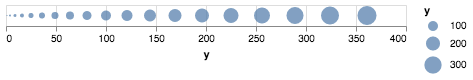

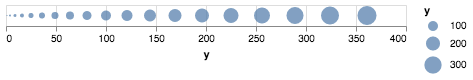

In [89]:
alt.Chart(data).mark_circle().encode(
    x='y',
    size='y'
)

## Marks

Attributes of chart objects like `mark` can be modified:

In [93]:
chart = linechart.copy()
chart.mark = 'area'

In [94]:
chart.to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'values': [{'x': 0, 'y': 0},
   {'x': 1, 'y': 1},
   {'x': 2, 'y': 4},
   {'x': 3, 'y': 9},
   {'x': 4, 'y': 16},
   {'x': 5, 'y': 25},
   {'x': 6, 'y': 36},
   {'x': 7, 'y': 49},
   {'x': 8, 'y': 64},
   {'x': 9, 'y': 81},
   {'x': 10, 'y': 100},
   {'x': 11, 'y': 121},
   {'x': 12, 'y': 144},
   {'x': 13, 'y': 169},
   {'x': 14, 'y': 196},
   {'x': 15, 'y': 225},
   {'x': 16, 'y': 256},
   {'x': 17, 'y': 289},
   {'x': 18, 'y': 324},
   {'x': 19, 'y': 361}]},
 'mark': 'area',
 'encoding': {'x': {'type': 'quantitative', 'field': 'x'},
  'y': {'type': 'quantitative', 'field': 'y'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json'}

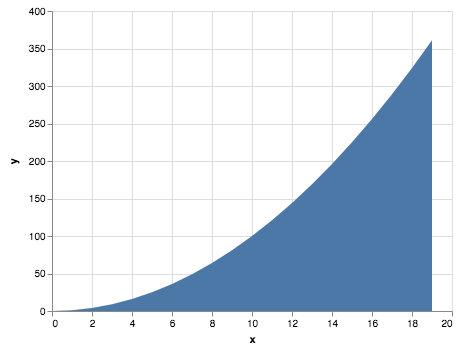

In [96]:
chart

Charts are normally constructed with the appropriate mark directly as follows:

In [ ]:
alt.Chart(data).mark_area().encode(
     x='x',
     y='y'
)

In [97]:
mark_options = [thing for thing in dir(alt.Chart) if thing.startswith('mark_')]
mark_options

['mark_area',
 'mark_bar',
 'mark_circle',
 'mark_geoshape',
 'mark_line',
 'mark_point',
 'mark_rect',
 'mark_rule',
 'mark_square',
 'mark_text',
 'mark_tick',
 'mark_trail']

#### Exercise: try changing the `mark_xyz` call to some of the above options

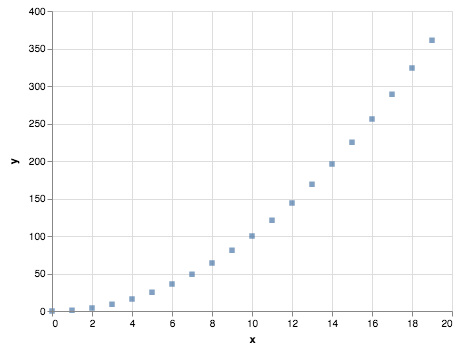

In [98]:
# For example
alt.Chart(data).mark_square().encode(
     x='x',
     y='y'
)

Here is a way to explore changing the mark interactively in Jupyter:

In [99]:
from ipywidgets import interact

In [100]:
@interact
def plot_with_mark_option(mark_option=mark_options):
    chart = getattr(alt.Chart(data), mark_option)().encode(
       x='x',
       y='y'
    )
    return chart

interactive(children=(Dropdown(description='mark_option', options=('mark_area', 'mark_bar', 'mark_circle', 'ma…

## Simple interactions

One of the nicest features of Altair is the grammar of interaction that it provides.
The simplest kind of interaction is the ability to pan and zoom along charts; Altair contains a shortcut to enable this via the ``interactive()`` method:

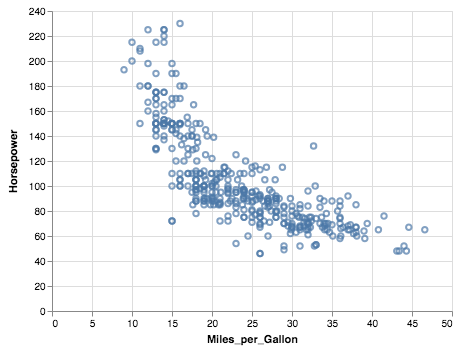

In [105]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    tooltip='Name'
).interactive(bind_y=False)

This lets you click and drag, as well as use your computer's scroll/zoom behavior to zoom in and out on the chart.

We'll see other interactions later.

## A Third Dimension: Color

A 2D plot allows us to encode two dimensions of the data. Let's look at using color to encode a third:

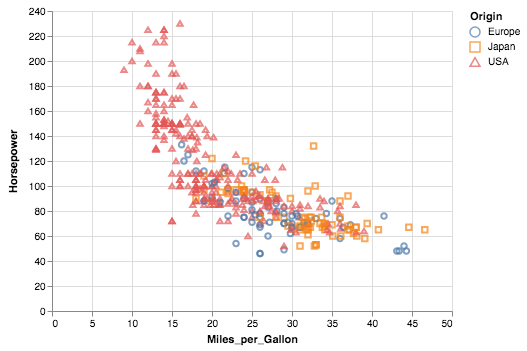

In [111]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    shape='Origin',
    color='Origin',
)

Notice that when we use a categorical value for color, it chooses an appropriate color map for categorical data.

Let's see what happens when we use a continuous color value:

In [113]:
cars.dtypes

Acceleration               float64
Cylinders                    int64
Displacement               float64
Horsepower                 float64
Miles_per_Gallon           float64
Name                        object
Origin                      object
Weight_in_lbs                int64
Year                datetime64[ns]
dtype: object

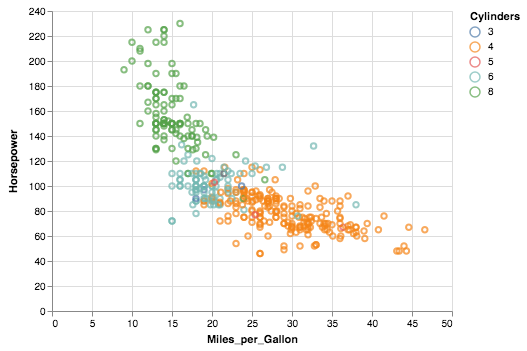

In [116]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders:N'
)

A continuous color results in a color scale that is appropriate for continuous data.

What about the in-between case: ordered categories, like number of cylinders?

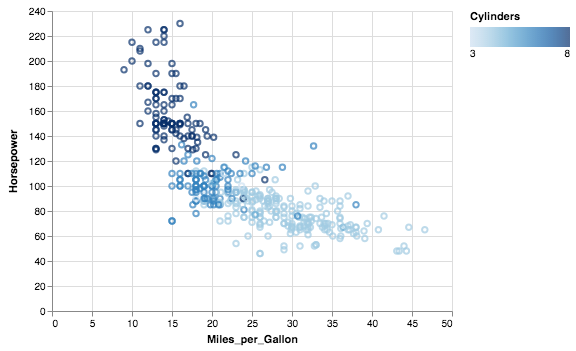

In [117]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders'
)

Altair still chooses a continuous value because the number of Cylinders is numerical.

We can improve this by specifying that the data should be treated as a discrete ordered value; we can do this by adding ``":O"`` ("O" for "ordinal" or "ordered categories") after the encoding:

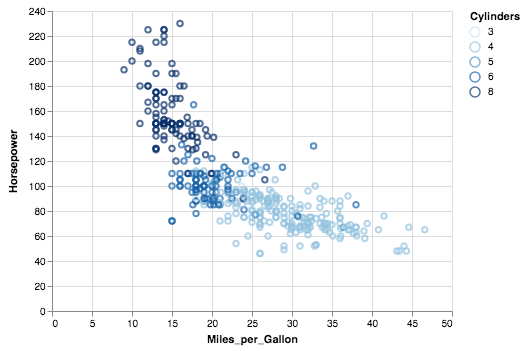

In [118]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders:O'
)

Now we get a discrete legend with an ordered color mapping.

#### Extended exercise:
Use Altair to recreate this plot:

<img src="extras/monte_carlo_pi.gif">

In [119]:
alt.Chart(mydata).mark_circle(size=1).encode(...)

Hint:

1. Use `numpy.random.uniform()` to simulate $5000$ uniformly distributed points $(x, y)$ in the interval $[0, 1)$
2. Construct a DataFrame with headings `x`, `y`, and a new column `'in_circle'`, containing `True` if the point is in the circle, `False` otherwise.

In [157]:
# %load solutions/altair_variates_circle.py

## Binning and aggregation

Let's return quickly to our 1D chart of miles per gallon:

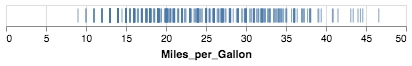

In [178]:
alt.Chart(cars).mark_tick().encode(
    x='Miles_per_Gallon',
)

Another way we might represent this data is to create a histogram: to bin the x data and show the count on the y axis.
In many plotting libraries this is done with a special method like ``hist()``. In Altair, such binning and aggregation is part of the declarative API.

To move beyond a simple field name, we use ``alt.X()`` for the x encoding, and we use ``'count()'`` for the y encoding:

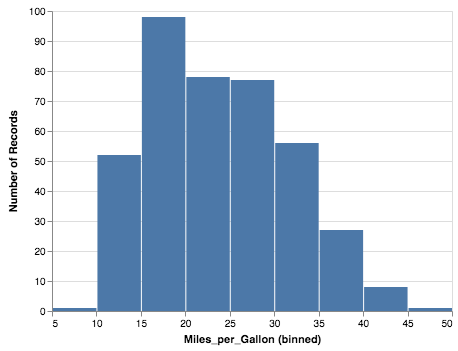

In [179]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    y='count()'
)

If we want more control over the bins, we can use ``alt.Bin`` to adjust bin parameters

In [181]:
from altair.expr import datum

In [191]:
cars_dodgy = cars.rename(columns={'Miles_per_Gallon': 'Miles per Gallon'})

In [192]:
cars_dodgy[:2]

,Acceleration,Cylinders,Displacement,Horsepower,Miles per Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01


### Question: use Pandas or Altair for filtering?
- Use Pandas `df.query()` if no spaces in columns
- Use Pandas if you want to reduce the amount of data you're plotting
- Use Altair if filtering is based on interactive selection etc.'

In [198]:
# This raises an exception due to the spaces in the column name:
# subset = cars_dodgy.query('"Miles per Gallon" >= 30')

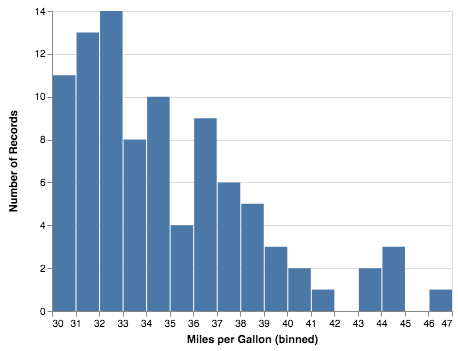

In [193]:
alt.Chart(cars_dodgy).mark_bar().encode(
    x=alt.X('Miles per Gallon', bin=alt.Bin(maxbins=30)),
    y='count()'
).transform_filter(
    datum['Miles per Gallon'] >= 30
)

If we apply another encoding (such as ``color``), the data will be automatically grouped within each bin:

In [ ]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Origin'
)

If you prefer a separate plot for each category, the ``column`` encoding can help:

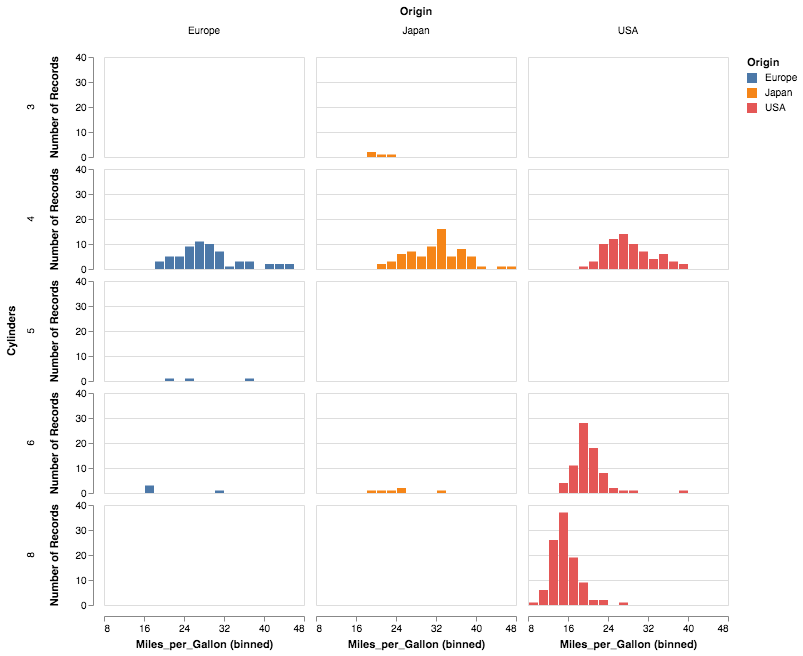

In [205]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Origin',
    column='Origin',
    row='Cylinders'
).properties(
    width=200,
    height=100
)

#### Break until 3:50pm

### Binning in 2d: heat maps

Binning and aggregation works in two dimensions as well; we can use the ``rect`` marker and visualize the count using the color:

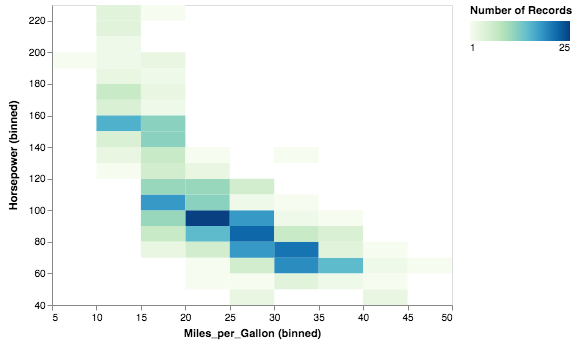

In [222]:
alt.Chart(cars).mark_rect().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    y=alt.Y('Horsepower', bin=alt.Bin(maxbins=30)),
    color=alt.Color('count()', scale=alt.Scale(scheme='greenblue'))
)

Aggregations can be more than simple counts; we can also aggregate and compute the mean of a third quantity within each bin

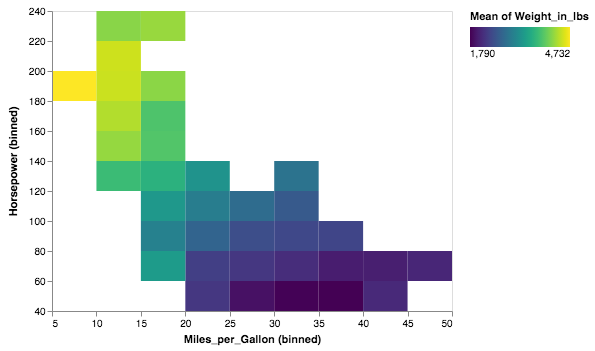

In [223]:
alt.Chart(cars).mark_rect().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    y=alt.Y('Horsepower', bin=True),
    color='mean(Weight_in_lbs)'
)

## Time-Series & Layering

So far we've been ignoring the ``date`` column, but it's interesting to see the trends with time of, for example, miles per gallon:

In [226]:
cars[:2]

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01


In [224]:
str(cars['Year'].dtype)

'datetime64[ns]'

In [231]:
cars['Year'].value_counts().sort_index()

1970-01-01    35
1971-01-01    29
1972-01-01    28
1973-01-01    40
1974-01-01    27
1975-01-01    30
1976-01-01    34
1977-01-01    28
1978-01-01    36
1979-01-01    29
1980-01-01    29
1982-01-01    61
Name: Year, dtype: int64

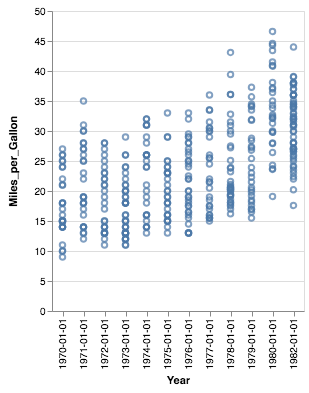

In [233]:
alt.Chart(cars).mark_point().encode(
    x='Year:N',
    y='Miles_per_Gallon:Q'
)

Each year has a number of cars, and a lot of overlap in the data.
We can clean this up a bit by plotting the mean at each x value:

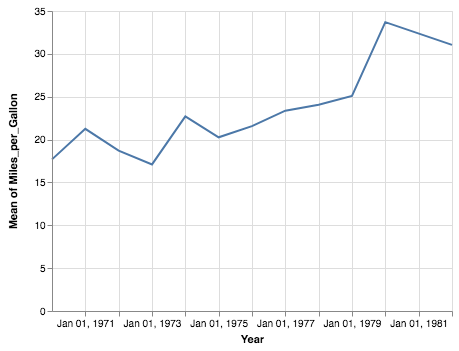

In [234]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)',
)

Alternatively, we can change the mark to ``area`` and use the ``ci0`` and ``ci1`` mark to plot the confidence interval of the estimate of the mean:

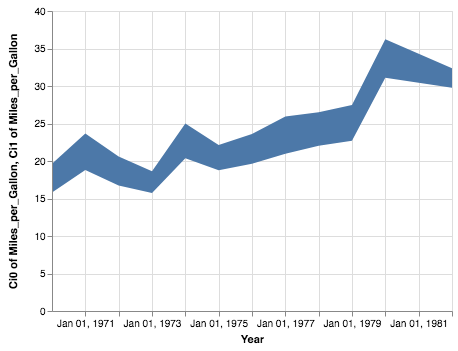

In [235]:
alt.Chart(cars).mark_area().encode(
    x='Year',
    y='ci0(Miles_per_Gallon)',
    y2='ci1(Miles_per_Gallon)'
)

Let's adjust this chart a bit: add some opacity, color by the country of origin, and make the width a bit wider, and add a cleaner axis title:

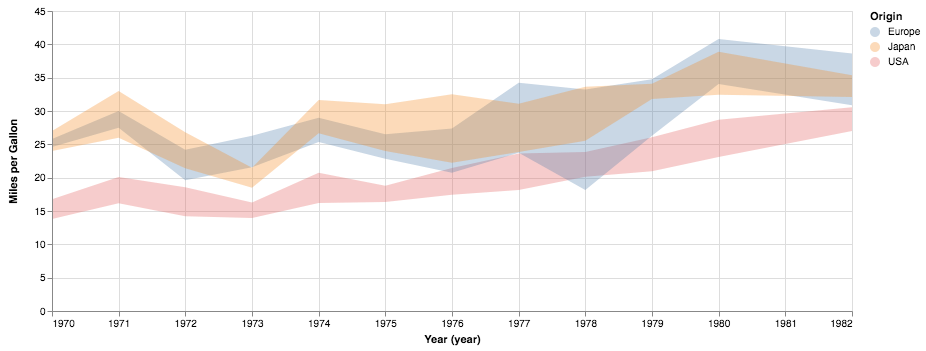

In [238]:
alt.Chart(cars).mark_area(opacity=0.3).encode(
    x=alt.X('Year', timeUnit='year'),
    y=alt.Y('ci0(Miles_per_Gallon)', axis=alt.Axis(title='Miles per Gallon')),
    y2='ci1(Miles_per_Gallon)',
    color='Origin'
).properties(
    width=800
)

Finally, we can use Altair's layering API to layer a line chart representing the mean on top of the area chart representing the confidence interval:

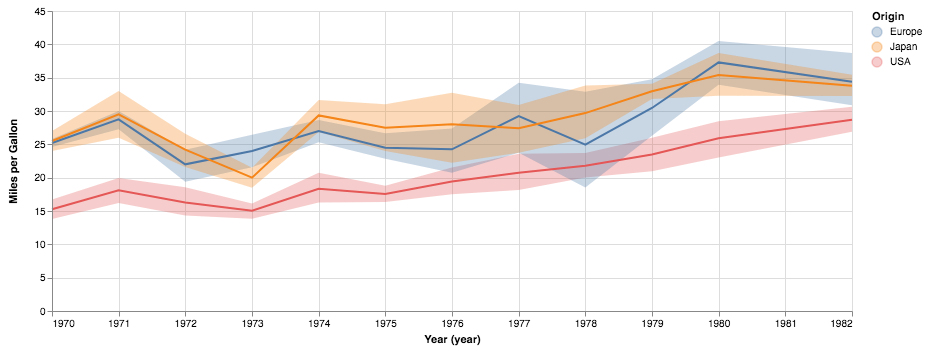

In [239]:
base = alt.Chart(cars).encode(
    x=alt.X('Year', timeUnit='year'),
    color='Origin'
).properties(
    width=800
)

spread = base.mark_area(opacity=0.3).encode(
    y=alt.Y('ci0(Miles_per_Gallon)', axis=alt.Axis(title='Miles per Gallon')),
    y2='ci1(Miles_per_Gallon)',
)

lines = base.mark_line().encode(
    y='mean(Miles_per_Gallon)',
)

spread + lines

### Exercise: exploring the `portfolio` time-series data

As you explore the data, recall the building blocks we've discussed:

- various marks: ``mark_point()``, ``mark_line()``, ``mark_tick()``, ``mark_bar()``, ``mark_area()``, ``mark_rect()``, etc.
- various encodings: ``x``, ``y``, ``color``, ``shape``, ``size``, ``row``, ``column``, ``text``, ``tooltip``, etc.
- binning and aggregations: a [List of available aggregations](https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation) can be found in Altair's documentation
- stacking and layering (``alt.layer`` <-> ``+``, ``alt.hconcat`` <-> ``|``, ``alt.vconcat`` <-> ``&``)

Start simple and build from there. Which encodings work best with quantitative data? With categorical data?
What can you learn about your dataset using these tools?

In [ ]:
# Hint: if you get MaxRowsError: enable automatic serialization to CSV or JSON:
# alt.data_transformers.enable('json')

In [247]:
from scipy.stats import zscore

In [248]:
zscore([1, 2, 3])

array([-1.22474487,  0.        ,  1.22474487])

In [246]:
import pandas as pd
stocks = pd.read_hdf('/Users/training/Training/Data/portfolio.h5', key='flat').reset_index()
stocks.rename(columns={'minor': 'Symbol'}, inplace=True)
stocks.sample(5)

,Symbol,Date,Open,High,Low,Close,Volume,Adj Close
7055,MSFT,2009-04-14,19.440001,19.549999,19.000000,19.350000,63796300.0,15.920382
1840,AAPL,2012-04-24,562.609993,567.690002,554.999992,560.280006,269037300.0,73.278652
6579,MSFT,2007-05-23,30.840000,30.840000,30.570000,30.580000,46322500.0,24.369599
7348,MSFT,2010-06-11,25.040001,25.719999,24.770000,25.660000,68057700.0,21.657610
703,AAPL,2007-10-18,171.500000,174.189995,171.050003,173.500006,205919000.0,22.691951


In [ ]:
# For a log, try:
# from altair.expr import datum
#.transform_calculate(
#    logClose='log(Close)'
#)


In [261]:
vol = alt.Chart(stocks).mark_rect(opacity=0.1).encode(
    x='Date:T',
    y=alt.Y('Volume:Q', bin=alt.Bin(maxbins=10)),
    column='Symbol:N'
)

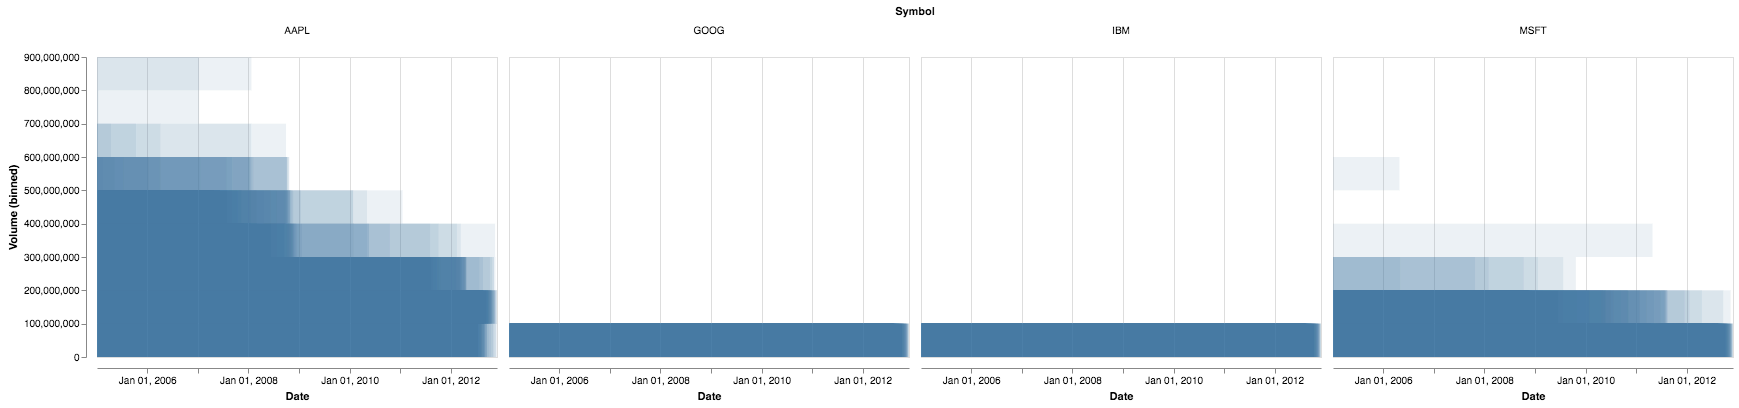

In [262]:
vol

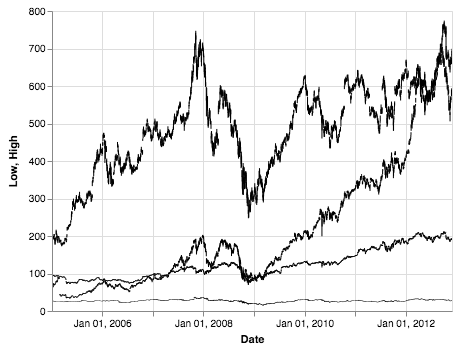

In [264]:
alt.Chart(stocks).mark_rule().encode(
    x='Date:T',
    y='Low:Q',
    y2='High:Q'
).interactive()

In [269]:
from scipy.stats import zscore

In [ ]:
# Shortcut: automatically serialize for you to .csv files
alt.data_transformers.enable('csv')

In [272]:
stocks['VolumeZ'] = stocks.groupby('Symbol')['Volume'].transform(zscore)

In [284]:
vol = alt.Chart(stocks).mark_circle().encode(
    x=alt.X('Date:T', timeUnit='yearmonth'),
    y=alt.Y('VolumeZ:Q'),
    color='Symbol:N'
)
vol.interactive().to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'url': 'altair-data-bdd0bf76cdd98165a482e9a0d21c257c.csv',
  'format': {'type': 'csv'}},
 'mark': 'circle',
 'encoding': {'color': {'type': 'nominal', 'field': 'Symbol'},
  'x': {'type': 'temporal', 'field': 'Date', 'timeUnit': 'yearmonth'},
  'y': {'type': 'quantitative', 'field': 'VolumeZ'}},
 'selection': {'selector015': {'type': 'interval',
   'bind': 'scales',
   'encodings': ['x', 'y']}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json'}

## Interactivity: Selections

Let's return to our scatter plot, and take a look at the other types of interactivity that Altair offers:

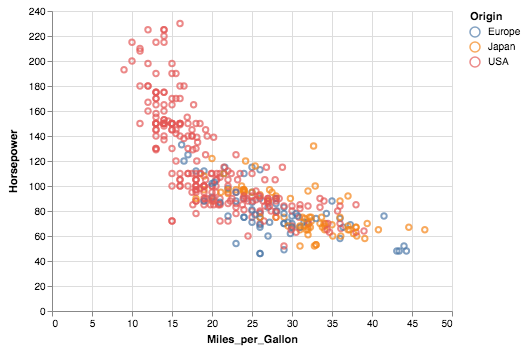

In [285]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
)

Recall that you can add ``interactive()`` to the end of a chart to enable the most basic interactive scales:

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
).interactive()

Altair provides a general ``selection`` API for creating interactive plots; for example, here we create an interval selection:

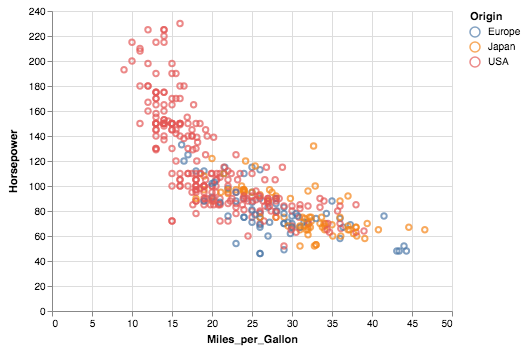

In [288]:
interval = alt.selection_interval(encodings=['y'])

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
).properties(
    selection=interval
)

Currently this selection doesn't actually do anything, but we can change that by conditioning the color on this selection:

### Question: how to change order of the legend

In [311]:
chart = alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.Color('Origin', sort=['Japan', 'Europe', 'USA'])
)

In [308]:
chart.save('mychart.svg')

In [310]:
!open -a "Google Chrome.app" mychart.svg

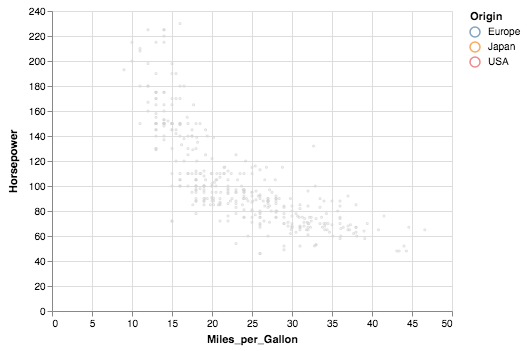

In [301]:
interval = alt.selection_interval(empty='none')

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray')),
    size=alt.condition(interval, alt.value(50), alt.value(1))
).properties(
    selection=interval
)

The nice thing about this selection API is that it *automatically* applies across any compound charts; for example, here we can horizontally concatenate two charts, and since they both have the same selection they both respond appropriately:

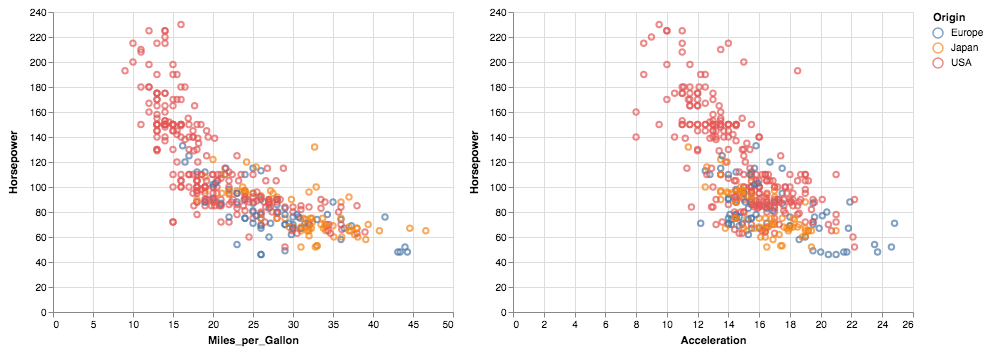

In [313]:
interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip='Name'
).properties(
    selection=interval
)

base.encode(x='Miles_per_Gallon') | base.encode(x='Acceleration')

We can do even more sophisticated things with selections as well.
For example, let's make a histogram of the number of cars by Origin, and stack it on our scatterplot:

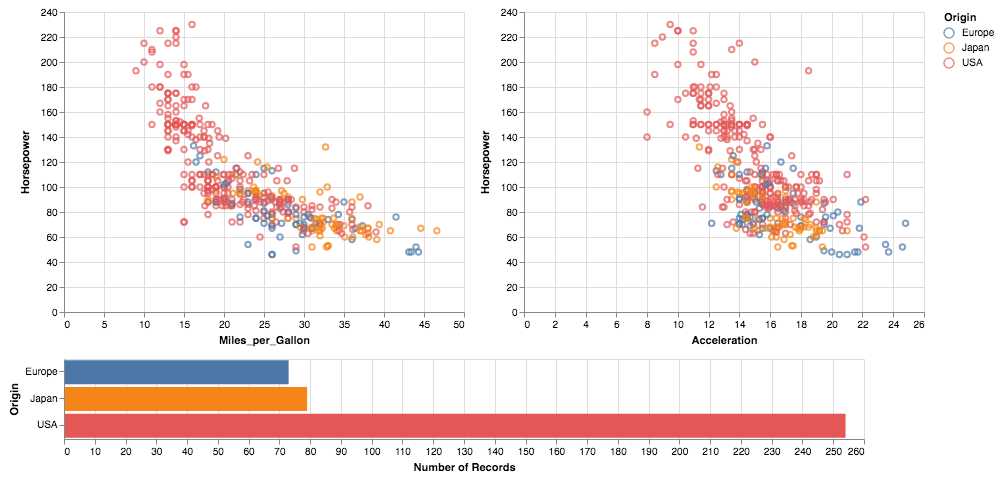

In [314]:
interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip='Name'
).properties(
    selection=interval
)

hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin'
).properties(
    width=800,
    height=80
).transform_filter(
    interval
)

scatter = base.encode(x='Miles_per_Gallon') | base.encode(x='Acceleration')

scatter & hist

This demo has covered a number of the available components of Altair.
In the following sections, we'll look into each of these a bit more systematically.